# Histogram plotting
Here we will try to learn to divide a graph into subgraphs and analyse the distribution of dataset using histograms. <br>
Histograms are importnat to understand the data distribution. <br>
We will plot each feature against the class label to check distribution of each attribute.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initializing dataset
df = pd.read_excel('C:\\Users\\abhay\\PycharmProjects\\Thesis Prework (Findings)\\Datasets\\Iris Dataset.xlsx')
print(df.head())

   Sepal length in cm  Sepal width in cm  Petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal width in cm  Class_label  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


# Converting non-numeric values in dataset to numeric
This is an important step as processing can only be done on numbers. <br>
The above dataset contains <i>String</i> values in class label. <br>
Hence below function runs through the dataset and converts these non-numeric values into numeric format.

In [3]:
# Pre-processing and cleaning dataset
def pre_process_data(dataset):
    dataset_new = dataset.copy()
    col_names = list(dataset_new.columns.values)

    columns = dataset_new.columns.values

    for column in columns:
        text_digit_values = {}

        def convert_to_int(val):
            return text_digit_values[val]

        if dataset_new[column].dtype != np.int64 and dataset_new[column].dtype != np.float64:
            column_contents = dataset[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            dataset_new[column] = list(map(convert_to_int, dataset[column]))
    return dataset_new

df_new = pre_process_data(df)
print(df_new.head())

   Sepal length in cm  Sepal width in cm  Petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal width in cm  Class_label  
0                0.2            2  
1                0.2            2  
2                0.2            2  
3                0.2            2  
4                0.2            2  


# Matrix representation of data
In order to work with histograms the data should be represented in the form of matrix. <br>
We have to seperate Class_labels from other attributes and keep them in different matrices.

In [4]:
# Feature and target seperation
features = df_new[["Sepal length in cm", "Sepal width in cm", "Petal length in cm", "Petal width in cm"]]
feature_names = features.columns.values
target_names = np.unique(df[['Class_label']])

# Converting Dataframe into array
features_array = features.values
target_array = df_new['Class_label'].values

# Display Matrices
print('Matrix for feature set\n', features_array)
print('Matrix for class label\n', target_array)

Matrix for feature set
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

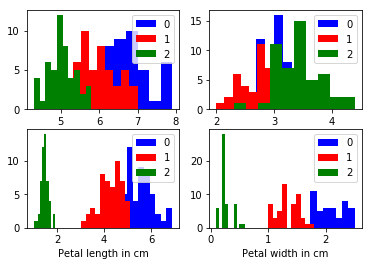

In [5]:
# Plot histogram
fig, axes = plt.subplots(nrows=2, ncols=2) # Dividing a graph into 4 blocks
colors = ['blue', 'red', 'green']
for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(target_names)), colors):
        ax.hist(features_array[target_array==label, i],
                label=label,
                color=color)
        ax.set_xlabel(feature_names[i])
        ax.legend(loc='upper right')
plt.plot()
plt.show()